In [51]:
import altair as alt
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [52]:
TrainingDF = pd.read_csv('./Data/Training/TrainingDataset.csv')
TrainingDF = TrainingDF.drop_duplicates(subset=["id"], keep=False)
TrainingDF = TrainingDF.drop(['track_name','artist_name','album_name','album_cover','release_date',
                        'preview_link','spotify_link','name', 'length','timeSignature'], axis=1)
avgMoods = TrainingDF.groupby(['playlist_mood']).mean().rename_axis('name').reset_index()
avgMoods

,name,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Angry,0.001977,0.454150,0.949772,0.079850,0.236935,-4.087314,0.096079,127.629462,0.366152
1,Calm,0.895027,0.364700,0.124585,0.707361,0.113412,-24.407203,0.042648,106.004259,0.209979
2,Content,0.385622,0.601000,0.532306,0.125440,0.168011,-8.774542,0.091729,120.594423,0.404129
3,Delighted,0.632165,0.492860,0.390787,0.185793,0.140367,-12.421353,0.044643,108.031899,0.361402
4,Depressed,0.471847,0.601961,0.446850,0.087845,0.169443,-10.236976,0.088669,119.316817,0.332227
5,Excited,0.117292,0.729557,0.795471,0.010512,0.192737,-4.759020,0.100053,120.293417,0.647761
6,Happy,0.340886,0.686773,0.569334,0.390535,0.168931,-8.260606,0.086328,114.153664,0.553290
7,Sad,0.615917,0.514530,0.438446,0.004437,0.141759,-8.602927,0.048379,116.038602,0.316674
8,Sleepy,0.906121,0.258595,0.056795,0.865927,0.112843,-29.006091,0.048526,95.947888,0.104368


In [53]:
TrainingDF

,id,playlist_mood,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,3ZFTkvIE7kyPt6Nu3PEa7V,Excited,0.284000,0.778,0.824,0.000000,0.405,-5.892,0.0707,100.024,0.758
1,4TsmezEQVSZNNPv5RJ65Ov,Excited,0.000155,0.779,0.640,0.000770,0.101,-8.415,0.1590,99.019,0.498
2,5qTvkDrSfvwDv6RBjjcfQr,Excited,0.615000,0.735,0.824,0.000000,0.158,-4.143,0.0360,100.202,0.726
3,1hRFVIy9As8OVRk8B7CrD5,Excited,0.016500,0.675,0.862,0.000427,0.169,-4.614,0.0253,129.967,0.498
4,1dzQoRqT5ucxXVaAhTcT0J,Excited,0.026400,0.822,0.739,0.000043,0.181,-4.541,0.0311,118.992,0.745
...,...,...,...,...,...,...,...,...,...,...,...
4361,36Cnb6bAuX9Qu1r7KNhgEe,Angry,0.000295,0.465,0.906,0.000000,0.228,-4.162,0.0322,87.504,0.322
4362,7iswbro8ijW2tUIJz0sVJd,Angry,0.000424,0.446,0.951,0.000011,0.146,-4.705,0.0627,180.132,0.345
4363,4o3giNuAzD4xUqMnoUSCpr,Angry,0.000093,0.580,0.949,0.000000,0.395,-4.498,0.0535,135.014,0.373
4364,1w9dh4qb32qDMvFfDYYFpP,Angry,0.002340,0.434,0.931,0.000012,0.522,-3.029,0.1470,110.143,0.316


In [54]:
def createSpider(df, x, y, ax, subs, final=False):
        temp = df.drop(["name"], axis=1)
        normalized_df = temp.rank(pct=True)
        categories = list(normalized_df)
        N = len(categories)

        subs = subs
        # We are going to plot the first line of the data frame.
        # But we need to repeat the first value to close the circular graph:

        ax.set_title(str(df['name'].iloc[x * subs + y][:17]) + '...', fontsize=8)
        values = normalized_df.iloc[x * subs + y].values.flatten().tolist()
        values += values[:1]
        values

        # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
        angles = [n / float(N) * 2 * math.pi for n in range(N)]
        angles += angles[:1]

        # Draw one axe per variable + add labels
        if final:
            ax.set_title(df['name'].iloc[x * subs + y], fontsize=16)
            plt.xticks(angles[:-1], categories, color='Black', size=10)

        # Draw ylabels
        # ax.set_rlabel_position(0)
        # ax.set_ylim([0,1])

        # Plot data
        ax.plot(angles, values, linewidth=1, linestyle='solid')

        # Fill area
        ax.fill(angles, values, 'b', alpha=0.1)

        return plt


In [55]:
def spiders(df, subs):
        # Initialise the spider plot
        temp = df.drop(["name"], axis=1)
        normalized_df = temp.rank(pct=True)
        categories = list(normalized_df)
        N = len(categories)

        fig, axes = plt.subplots(subs, subs, subplot_kw=dict(polar=True))
        fig.suptitle("Song Feature Plots")
        fig.set_size_inches(18.5, 10.5)
        x = y = 0

        for axisRow in axes:
            for ax in axisRow:
                ax.set_title(temp.iloc[x, y])
                ax.set_yticklabels([])
                ax.set_xticklabels([])
                ax.yaxis.grid(False)
                ax.spines['polar'].set_visible(False)
                self.createSpider(df, x, y, ax, subs)

                y += 1
                y = y % subs
            x += 1
            x %= subs

        plt.savefig('spiderPlots.png')
        plt.subplots_adjust(wspace=.4, hspace=.4)
        return plt


In [56]:
def graphMeans(self, audioFeaturesDF):
        source = pd.DataFrame(audioFeaturesDF.drop(
            columns=['timeSignature', 'tempo', 'loudness']))


        source = pd.DataFrame(source.mean(axis=0), columns=['Mean']).reset_index()
        return alt.Chart(source).mark_bar().encode(x='index', y='Mean')

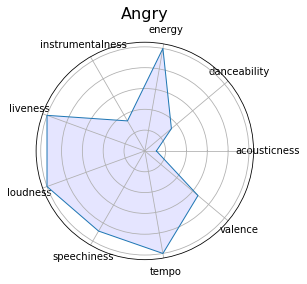

In [57]:
new_ax = plt.subplot(111,polar=True)
new_ax.set_yticklabels([])
createSpider(avgMoods, 0, 0, new_ax, 0, True).show()

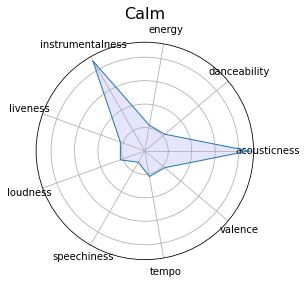

In [58]:
new_ax = plt.subplot(111,polar=True)
new_ax.set_yticklabels([])
createSpider(avgMoods, 0, 1, new_ax, 0, True).show()

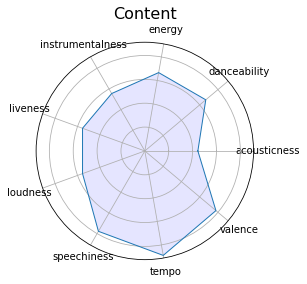

In [59]:
new_ax = plt.subplot(111,polar=True)
new_ax.set_yticklabels([])
createSpider(avgMoods, 0, 2, new_ax, 0, True).show()

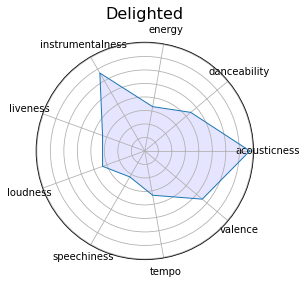

In [60]:
new_ax = plt.subplot(111,polar=True)
new_ax.set_yticklabels([])
createSpider(avgMoods, 0, 3, new_ax, 0, True).show()

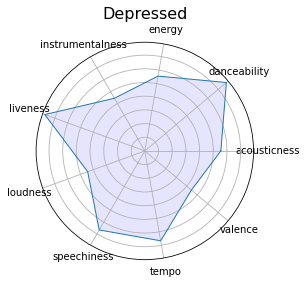

In [61]:
new_ax = plt.subplot(111,polar=True)
new_ax.set_yticklabels([])
createSpider(avgMoods, 0, 4, new_ax, 0, True).show()

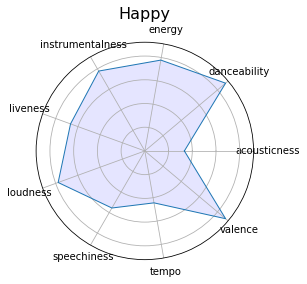

In [62]:
new_ax = plt.subplot(111,polar=True)
new_ax.set_yticklabels([])
createSpider(avgMoods, 0, 6, new_ax, 0, True).show()

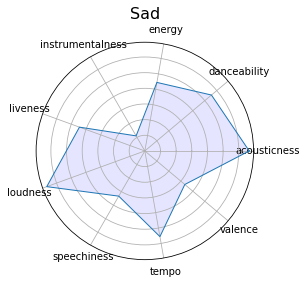

In [63]:
new_ax = plt.subplot(111,polar=True)
new_ax.set_yticklabels([])
createSpider(avgMoods, 0, 7, new_ax, 0, True).show()

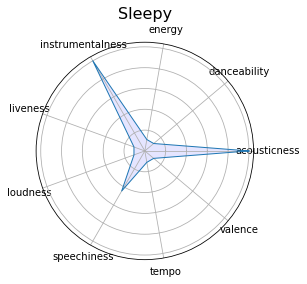

In [64]:
new_ax = plt.subplot(111,polar=True)
new_ax.set_yticklabels([])
createSpider(avgMoods, 0, 8, new_ax, 0, True).show()